SVM : The Kernel Trick

In [9]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

columns_to_drop = ['Age', 'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness', 'BloodPressure', 'Pregnancies']
df = df.drop(columns=columns_to_drop)

df.head()


#split the dataset
X = df.iloc[:, :-1].to_numpy() #sélectionne toutes les lignes (:), mais seulement les colonnes jusqu'à l'avant-dernière colonne ([:-1]) NON,qui est généralement la colonne de la variable cible (la variable que tu cherches à prédire). 
Y = df.iloc[:,-1].to_numpy() #Cette ligne extrait la variable cible (target) de ton DataFrame df. Elle sélectionne toutes les lignes (:), mais seulement la dernière colonne (-1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [7]:
# Importation des bibliothèques nécessaires
from sklearn.preprocessing import StandardScaler  # Pour normaliser les données
from sklearn.svm import SVC  # Pour le modèle SVM
from sklearn.metrics import accuracy_score  # Pour évaluer la performance du modèle

# Création d'une instance de StandardScaler pour normaliser les données
scaler = StandardScaler()

# Création d'une instance de SVC avec un noyau RBF et une initialisation aléatoire fixe
clf_svc = SVC(kernel='rbf', random_state=0)

# Normalisation des données d'entraînement
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# Entraînement du modèle SVM sur les données normalisées
clf_svc.fit(X_train_scaled, y_train)

# Prédictions sur de nouvelles instances après normalisation
predictions = clf_svc.predict(scaler.transform([[90, 20], [200, 30]]))

# Affichage des prédictions
print(predictions)

[0 1]


In [8]:
# Prédictions du modèle SVM sur les données d'entraînement normalisées
y_pred = clf_svc.predict(X_train_scaled)

# Calcul de la précision en comparant les prédictions avec les étiquettes d'entraînement
accuracy = accuracy_score(y_train, y_pred)

# Affichage de la précision
print(accuracy)


0.755700325732899


In [12]:
# Normalisation des données de test à l'aide du même scaler utilisé pour les données d'entraînement
X_test_scaled = scaler.transform(X_test)

# Prédictions du modèle SVM sur les données de test normalisées
y_pred = clf_svc.predict(X_test_scaled)

# Calcul de la précision en comparant les prédictions avec les véritables étiquettes de test
accuracy = accuracy_score(y_test, y_pred)

# Affichage de la précision sur les données de test
print(accuracy)


0.7987012987012987


Clustering

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

df = pd.read_csv('diabetes.csv')

columns_to_drop = ['Age', 'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness', 'BloodPressure', 'Pregnancies']
df = df.drop(columns=columns_to_drop)

df.head()


,Glucose,BMI,Outcome
0,148,33.6,1
1,85,26.6,0
2,183,23.3,1
3,89,28.1,0
4,137,43.1,1


In [19]:
#Les statistiques descriptives d'un dataframe
df.describe()

,Glucose,BMI,Outcome
count,768.000000,768.000000,768.000000
mean,120.894531,31.992578,0.348958
std,31.972618,7.884160,0.476951
min,0.000000,0.000000,0.000000
25%,99.000000,27.300000,0.000000
50%,117.000000,32.000000,0.000000
75%,140.250000,36.600000,1.000000
max,199.000000,67.100000,1.000000


Text(0, 0.5, 'Glucose')

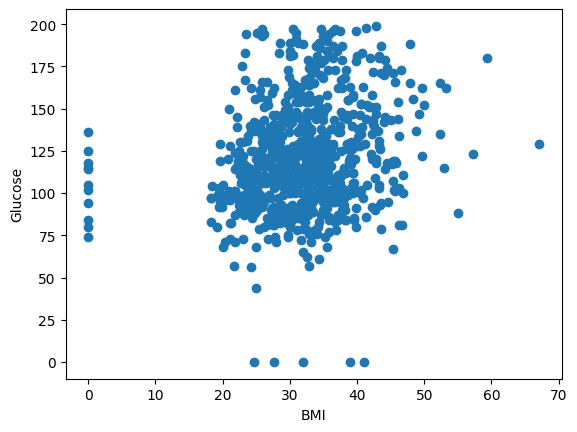

In [20]:
plt.scatter(df['BMI'], df['Glucose'])
plt.xlabel('BMI')
plt.ylabel('Glucose')

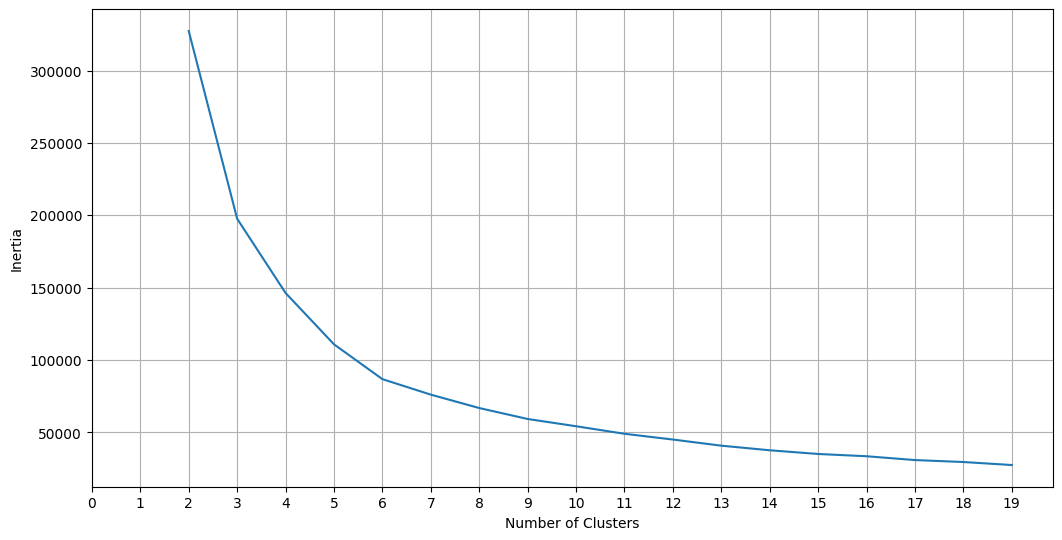

In [24]:
# Importation des bibliothèques nécessaires
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialisation d'une liste pour stocker les valeurs d'inertie
inertias = [] #définie comme la somme des carrés des distances euclidiennes entre chaque point de données dans un cluster et le centroïde de ce cluster

# Boucle à travers un certain nombre de clusters (de 2 à 19 dans ce cas)
for k in range(2, 20):
    # Création d'un modèle KMeans avec un nombre de clusters donné
    kmeans = KMeans(init='k-means++', random_state=0, n_clusters=k, n_init=10)
    
    # Entraînement du modèle sur le DataFrame 'df'
    kmeans.fit(df)
    
    # Ajout de l'inertie du modèle à la liste
    inertias.append(kmeans.inertia_)

# Création d'une figure pour afficher le coude
plt.figure(figsize=(12.4, 6.2))
plt.grid()

# Tracé de la courbe du coude
plt.plot(range(2, 20), inertias)

# Configuration des axes et des étiquettes
plt.xticks(range(0, 20))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Affichage de la figure
plt.show()

#Interpretation
#La courbe du coude est utilisée pour identifier le nombre optimal de clusters.
#Le point où l'inertie cesse de diminuer rapidement est appelé le coude.
#Dans cette visualisation, vous recherchez le point où l'inertie commence à se stabiliser,
#indiquant que l'ajout de clusters supplémentaires n'apporte pas beaucoup d'amélioration. Ce point est généralement choisi comme le nombre optimal de clusters.


In [27]:
# Importation de la classe KMeans depuis sklearn.cluster
from sklearn.cluster import KMeans

# Création d'une instance de KMeans avec 3 clusters, initialisation k-means++, et 10 itérations d'initialisation
Kmeans = KMeans(random_state=0, n_clusters=3, n_init=10)

# Ajustement du modèle KMeans aux données du DataFrame df
Kmeans.fit(df)

# Affichage des centres de cluster résultants après l'ajustement du modèle
print(Kmeans.cluster_centers_)


[[9.20159744e+01 3.01865815e+01 1.40575080e-01]
 [1.71034965e+02 3.51671329e+01 7.41258741e-01]
 [1.26884615e+02 3.23493590e+01 3.78205128e-01]]


In [ ]:
# Prédiction du cluster pour la première ligne du DataFrame (index 0)
print(Kmeans.predict(df.loc[[0]]))

# Prédiction du cluster pour la deuxième ligne du DataFrame (index 1)
print(Kmeans.predict(df.loc[[1]]))

In [32]:
# Ajout d'une nouvelle colonne 'Cluster' au DataFrame df et attribution des labels de cluster générés par le modèle KMeans
df['Cluster'] = Kmeans.labels_

# Affichage des cinq premières lignes du DataFrame avec la nouvelle colonne 'Cluster'
df.head()


,Glucose,BMI,Outcome,Cluster
0,148,33.6,1,2
1,85,26.6,0,0
2,183,23.3,1,1
3,89,28.1,0,0
4,137,43.1,1,2


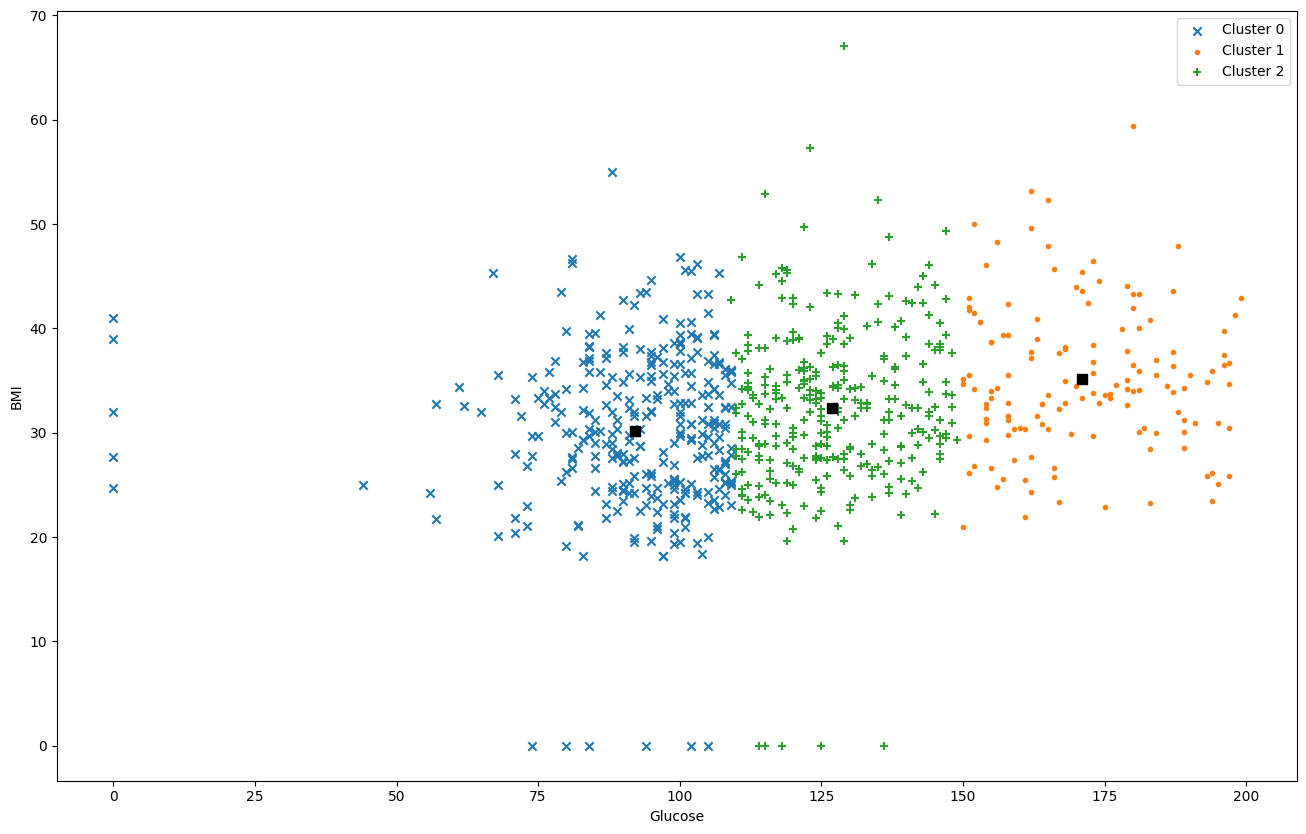

In [39]:
# Création d'une figure avec une taille spécifiée (16x10)
plt.figure(figsize=(16,10))

# Différents marqueurs pour chaque cluster
markers = ['x', '.', '+']

# Boucle pour chaque cluster
for i in range(0,3):
    # Sélection des points de données pour le cluster actuel
    cond = df['Cluster'] == i
    df2 = df[cond]

    # Tracé de la dispersion des points pour le cluster actuel
    plt.scatter(df2['Glucose'], df2['BMI'], label='Cluster ' + str(i), marker=markers[i])

# Tracé des centres de cluster en utilisant des carrés noirs
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], color='black', s=50, marker="s")

# Ajout de labels aux axes x et y
plt.xlabel('Glucose')
plt.ylabel('BMI')

# Ajout d'une légende pour indiquer les clusters
plt.legend()


#Explication :

#Une figure de taille spécifiée est créée pour afficher le nuage de points.
#Un tableau de marqueurs est défini pour chaque cluster.
#Une boucle est utilisée pour parcourir chaque cluster et tracer les points de données correspondants avec un marqueur distinct.
#Les centres de cluster sont marqués avec des carrés noirs.
#Les labels des axes x et y sont ajoutés.
#Une légende est ajoutée pour indiquer les différents clusters.

Dans ce code, nous avons effectué une analyse de clustering sur un DataFrame 'df' en utilisant l'algorithme KMeans de la bibliothèque scikit-learn. Initialement, une boucle a été utilisée pour ajuster le modèle KMeans pour un nombre variable de clusters (de 2 à 19) et enregistrer les valeurs d'inertie associées. Ensuite, une figure a été créée pour représenter graphiquement la courbe du coude, aidant à choisir un nombre optimal de clusters en fonction du coude de la courbe. Après avoir choisi 3 clusters, un modèle KMeans a été ajusté au DataFrame 'df', et les centres de cluster ont été affichés. Ensuite, les clusters ont été prédits pour les deux premières lignes du DataFrame. Une nouvelle colonne 'Cluster' a été ajoutée au DataFrame, contenant les labels de cluster générés par le modèle KMeans. Enfin, une figure a été créée pour visualiser la répartition des points de données en fonction de deux caractéristiques ('Glucose' et 'BMI'), avec des marqueurs distincts pour chaque cluster et des carrés noirs représentant les centres de cluster.